# **Assignment 1 - ML Data Cleaning & Feature text**


```
Shriya Pandita
002747729
```



**Background:**

In this notebook I am trying to analyse world's top universities. I am exploring the QS World University Rankings® 2023 based on 8 key ranking indicators.
This year’s QS World University Rankings include almost 1,500 institutions from around the world.


**Target Variable/Dependent Variable**

**Rank** - What is helping find the ranks of the university. This is the variable we have to predict.

**Predictor Variables/Independent Variables**

**ar score** - Academic Reputation score

**er score** - Employer Reputation score

**fsr score** - Faculty Student score

**cpf score**- Citations per faculty score

**ifr score** - International Faculty score

**isr score** - International Students score

**irn score** - International Research Network score

**ger score** - Employment Outcome score



In [48]:
#loading the required libraries
#!pip install Jinja2 2.11.3
!pip install eli5
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [279]:
#loading the dataset
df = pd.read_csv("/content/2023 QS World University Rankings.csv")

In [280]:
df1=df

In [281]:
#checking for the null values in all columns
df.isnull().sum()


Rank              0
institution       0
location code     0
location          0
ar score          0
ar rank           0
er score          1
er rank           0
fsr score         2
fsr rank          0
cpf score         5
cpf rank          0
ifr score        98
ifr rank         98
isr score        57
isr rank         57
irn score        13
irn rank         13
ger score        12
ger rank         12
score scaled      0
dtype: int64

In [220]:
# dropping the rank columns as it isnt needed for analysis
df.drop(['ar rank', 'er rank', 'fsr rank', 'cpf rank','isr rank', 'irn rank','ger rank', 'ifr rank', 'score scaled'], axis=1,inplace= True)

In [221]:
## dropping location code,institution, and location columns 
df.drop(['location code', 'institution', 'location'], axis=1,inplace= True)

**Q. What are the data types? (Only numeric and categorical)**

In [222]:
#Types of data
df.dtypes

Rank           int64
ar score     float64
er score     float64
fsr score    float64
cpf score    float64
ifr score    float64
isr score    float64
irn score    float64
ger score    float64
dtype: object

The dataset has 9 Numerical Features.

In [223]:
# viewing the top 5 rows
df.head()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


**Are there missing values?**

In [224]:
df.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

**Which independent variables have missing data? How much?**

Yes, there are missing values as we can see for the following independent scores.

er score 1

fsr score 2

cpf score 5

ifr score 98 

isr score 57

irn score 13

ger score 12



In [225]:
# Creating a copy of the dataframe
newdata= df.copy()
newdata.head()


,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


In [226]:
# performing knn imputation to fill in the missing values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
imputer = KNNImputer(n_neighbors=5)
newdata = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

newdata.isnull().sum()

Rank         0
ar score     0
er score     0
fsr score    0
cpf score    0
ifr score    0
isr score    0
irn score    0
ger score    0
dtype: int64

<Figure size 576x360 with 0 Axes>

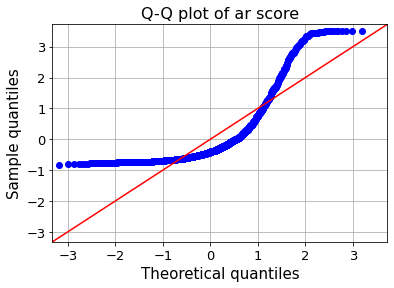

<Figure size 576x360 with 0 Axes>

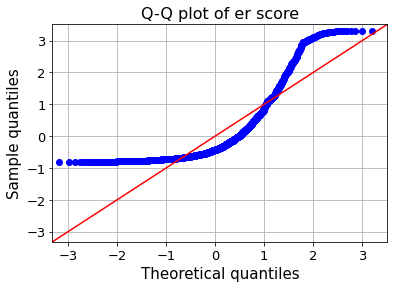

<Figure size 576x360 with 0 Axes>

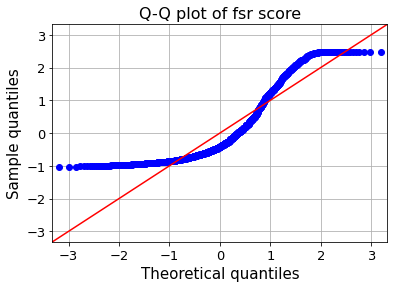

<Figure size 576x360 with 0 Axes>

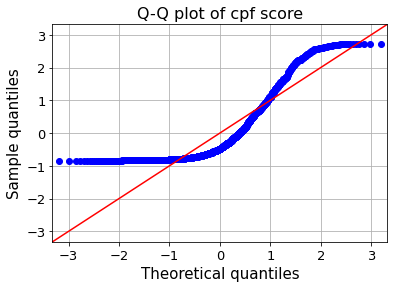

<Figure size 576x360 with 0 Axes>

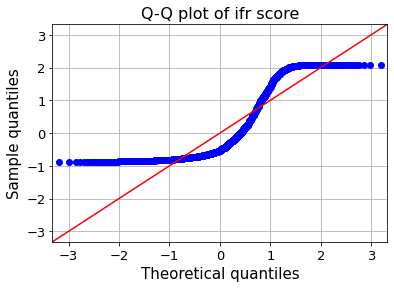

<Figure size 576x360 with 0 Axes>

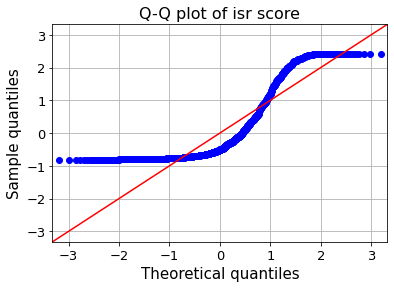

<Figure size 576x360 with 0 Axes>

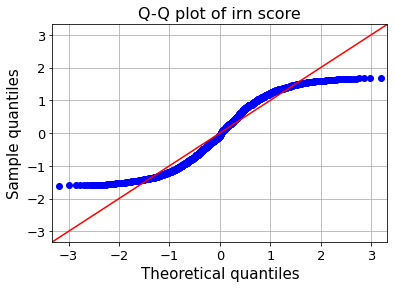

<Figure size 576x360 with 0 Axes>

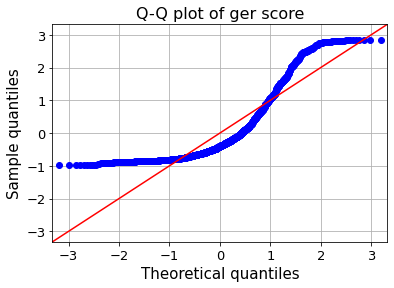

In [227]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=newdata[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score'
       ,'ger score']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

**What are the likely distributions of the numeric variables?
What are the distributions of the predictor variables?**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b7ef354f0>,
      dtype=object)

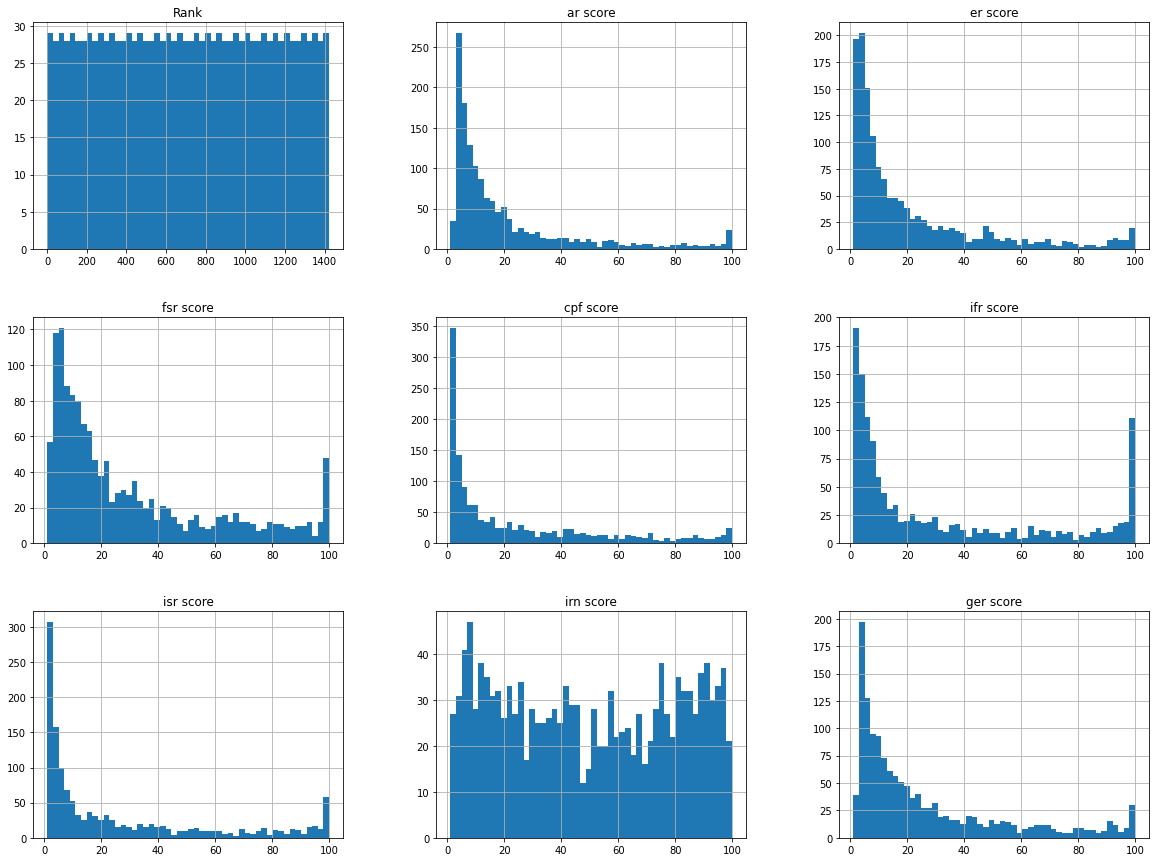

In [229]:

# Get only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Plot histograms for each numeric column
df[numeric_columns].hist(bins=50, figsize=(20,15))

The distrubution followed by most of the scores comes out to be Right Skewed Distribution.
Although, they tend to become normally distributed with progression.
The distribution is as follows:

*   ar score, er score, fsr score, cpf score, ifr score, isr score & ger 
score: Right Skewed Distribution.
*   irn score: Normal Distribution



**Do the ranges of the predictor variables make sense?** 


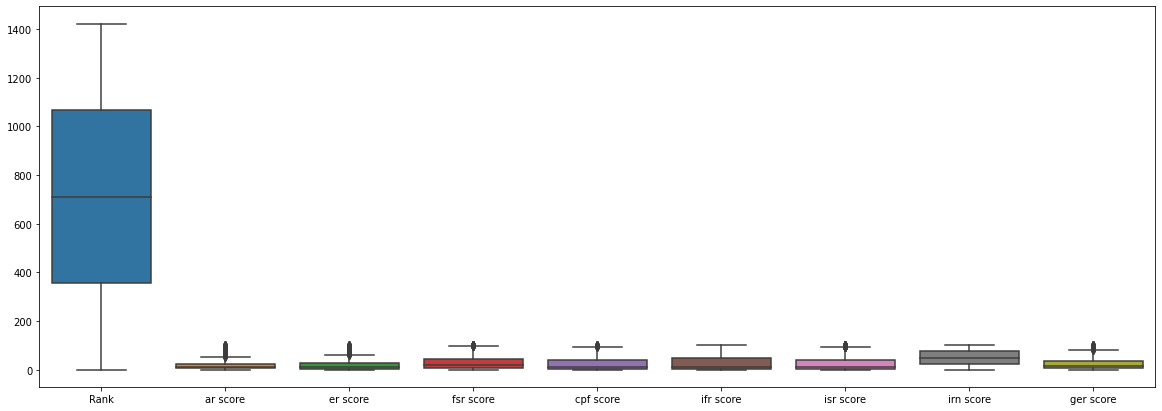

In [230]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=newdata)

In [231]:
#Range of each column
newdata.max() - newdata.min()
newdata.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,711.500000,20.124684,20.650914,29.964937,24.460028,30.331561,25.808776,49.399409,26.100647
std,410.640354,22.802706,24.020620,28.165843,27.886674,33.455492,30.542261,30.144495,26.117151
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,356.250000,5.400000,4.400000,8.200000,3.100000,4.800000,3.200000,21.625000,6.800000
50%,711.500000,10.800000,10.300000,18.200000,10.950000,12.640000,10.300000,47.000000,15.500000
75%,1066.750000,23.775000,26.950000,43.475000,39.200000,49.075000,38.700000,77.375000,36.300000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000




1.   As we can see, the distribution is either normal or tending to be normal in all variables except for rank. 
2.   The range for all of the scores ranges from 0 to 100.
3.   These score are independent/predictor variables hence the range is justified.
4.   The column rank is a consolidated dataset of 1422 universities which justifies its range from 1 to 1422. Hence we can see a uniform distribution for the same.







# **Data transforming, Feature creation and Analysis**

In [233]:
# Normalizing the data in the rank column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = newdata[['Rank']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
newdata[['Rank']] = pd.DataFrame(x_scaled)

In [234]:
newdata.head()


,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,0.000000,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,0.000704,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,0.001407,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,0.002111,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,0.002815,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


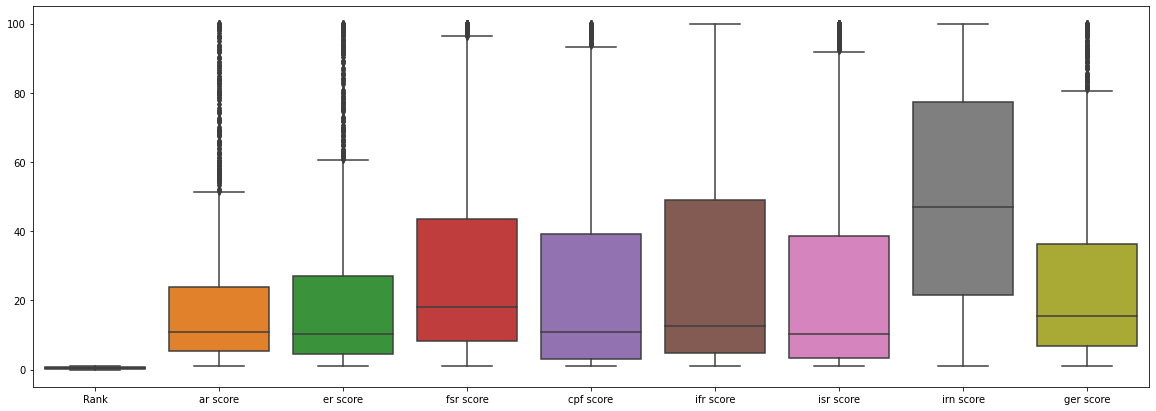

In [235]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=newdata)

**In the predictor variables independent of all the other predictor variables?**



No, they are not independent of each other as seen below. There is multi - collinearity among lot of the independent variable which is shown by the correlation table, heatmap and pairplot map.

In [236]:
newdata.corr()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
Rank,1.000000,-0.736358,-0.660940,-0.580807,-0.659282,-0.572367,-0.535034,-0.639821,-0.475526
ar score,-0.736358,1.000000,0.842919,0.374992,0.558307,0.415630,0.406949,0.616660,0.563289
er score,-0.660940,0.842919,1.000000,0.342738,0.429492,0.370071,0.372894,0.425420,0.576776
fsr score,-0.580807,0.374992,0.342738,1.000000,0.118821,0.179997,0.235483,0.167764,0.291551
cpf score,-0.659282,0.558307,0.429492,0.118821,1.000000,0.445985,0.362950,0.594143,0.361509
ifr score,-0.572367,0.415630,0.370071,0.179997,0.445985,1.000000,0.719588,0.414264,0.330870
isr score,-0.535034,0.406949,0.372894,0.235483,0.362950,0.719588,1.000000,0.371316,0.311141
irn score,-0.639821,0.616660,0.425420,0.167764,0.594143,0.414264,0.371316,1.000000,0.262862
ger score,-0.475526,0.563289,0.576776,0.291551,0.361509,0.330870,0.311141,0.262862,1.000000


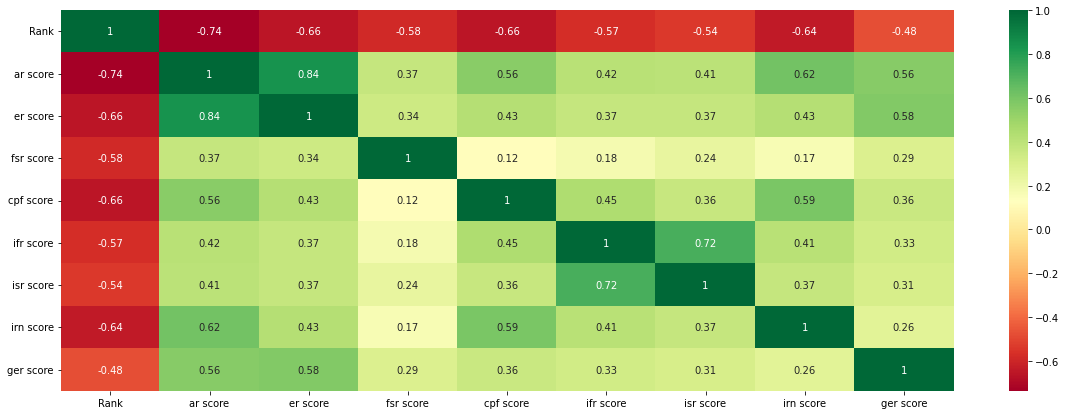

In [237]:
plt.figure(figsize=(20,7))
sns.heatmap(newdata.corr(), annot=True, cmap='RdYlGn')

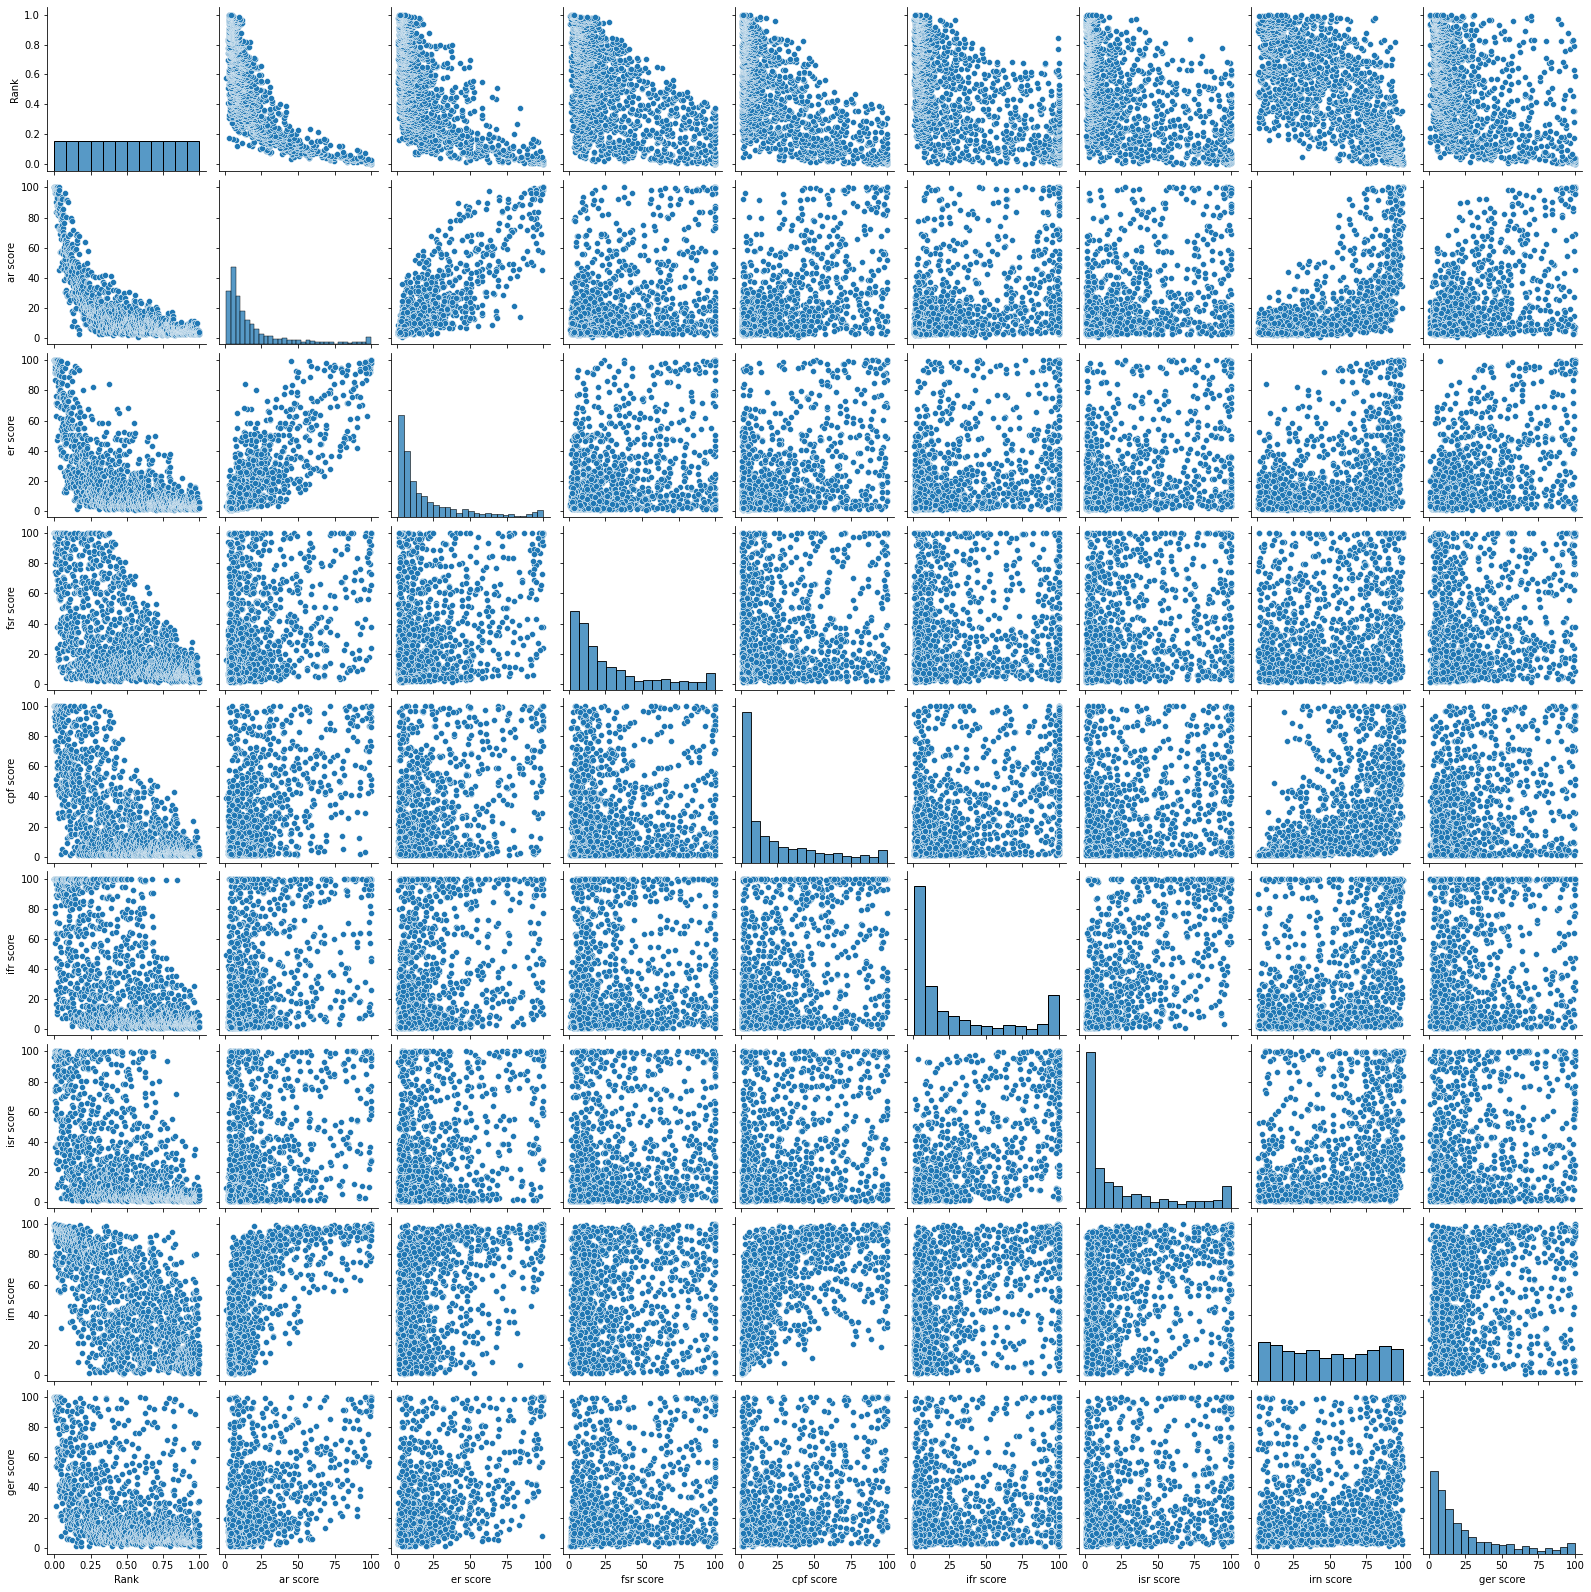

In [238]:
sns.pairplot(newdata)

**Which independent variables are useful to predict a target (dependent variable)?**




In [239]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(newdata['Rank'],newdata[['ar score','er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score','ger score']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rank   R-squared (uncentered):                   0.490
Model:                            OLS   Adj. R-squared (uncentered):              0.487
Method:                 Least Squares   F-statistic:                              169.8
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                   1.28e-200
Time:                        03:37:31   Log-Likelihood:                         -758.14
No. Observations:                1422   AIC:                                      1532.
Df Residuals:                    1414   BIC:                                      1574.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ar score      -0.0140      0.001    -13.390      0.000      -0.016      -0.012
er score       0.0026      0.001      2.974      0.003       0.001       0.004
fsr score      0.0015      0.000      3.824      0.000       0.001       0.002
cpf score     -0.0039      0.001     -7.322      0.000      -0.005      -0.003
ifr score     -0.0006      0.000     -1.160      0.246      -0.002       0.000
isr score     -0.0005      0.001     -0.869      0.385      -0.001       0.001
irn score      0.0101      0.000     24.888      0.000       0.009       0.011
ger score      0.0052      0.001     10.122      0.000       0.004       0.006
==============================================================================
Omnibus:                       84.689   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.513
Skew:                           0.066   Prob(JB):                     8.71e-08
Kurtosis:                       2.271   Cond. No.                         11.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will consider a significance value of 0.05 for determining the significance of our predictor variables which means if

p value is greater that 0.05 - feature is not significant for predicting the target variable
p value is less than 0.05 - feature is significant for predicting the target variable

1. The ar score has the p-value 0.0, which is lesser and hence it is a significant feature.
2. The er score has the p-value 0.003, which is lesser and hence it is a significant feature.
3. The fsr score has the p-value 0.0, which is lesser and hence it is a significant feature.
4. The cpf score has the p-value 0.0, which is lesser and hence it is a significant feature.
5. The ifr score has the p-value 0.246, which is greater and hence it is a not so significant feature.
6. The isr score has the p-value 0.385, which is greater and hence it is a significant feature.
7. The irn score has the p-value 0.0, which is lesser and hence it is a significant feature.
8. The ger score has the p-value 0, which is lesser and hence it is a significant feature.




## `Do the training and test sets have the same data? 

In [248]:
from sklearn.model_selection import  train_test_split

X = newdata[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score'
       ,'ger score']]

y = newdata['Rank']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

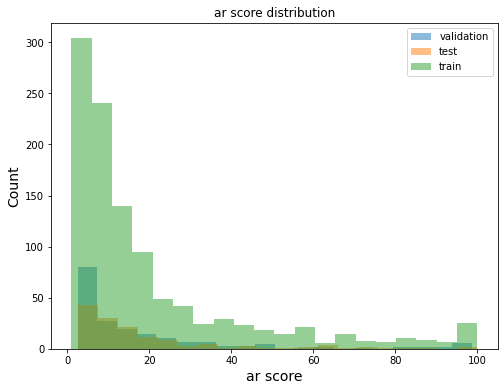

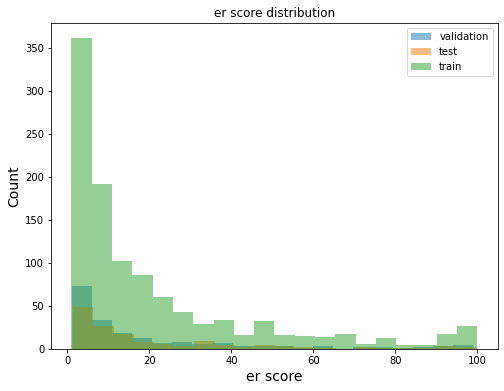

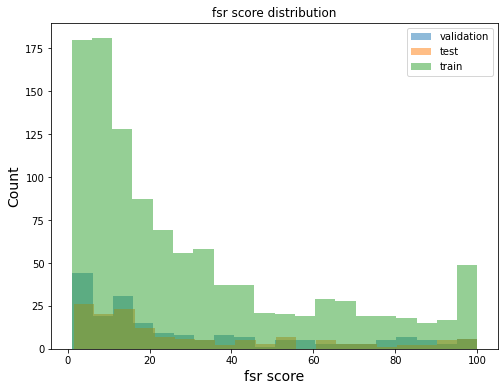

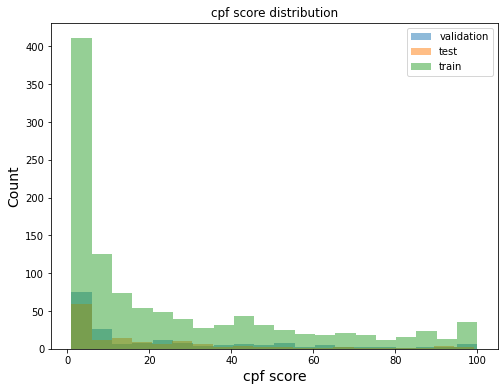

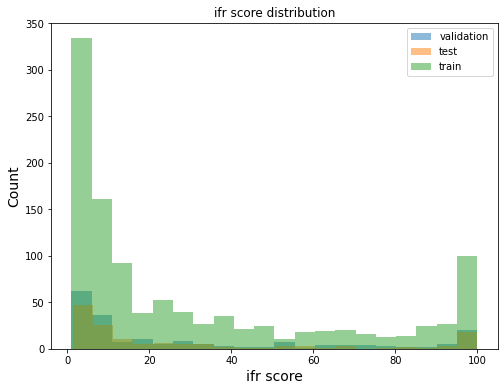

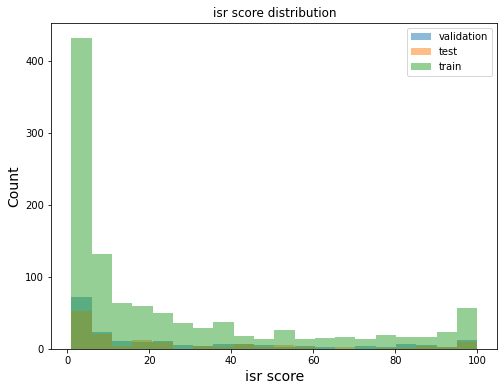

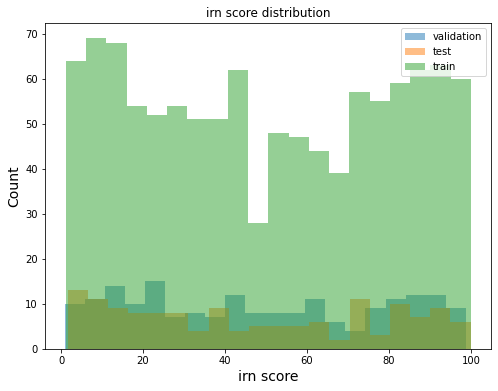

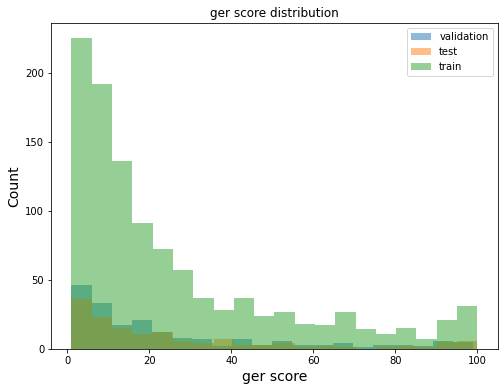

In [249]:
X_test_plot = X_test[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score'
       ,'ger score']]

X_val_plot = X_val[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score'
       ,'ger score']]

X_train_plot = X_train[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score'
       ,'ger score']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

Yes, most of the data are same in test, train and validation data set except the data points in training set are more and few boundary values are not included in train and validation data set.


In [250]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model


In [251]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [252]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.01
Coefficient of determination: 0.83
R^2 score on tarining set = 0.8284823513372345


In [253]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.01
Coefficient of determination: 0.83
R^2 score on test set = 0.8314624743172447


In [254]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.01
Coefficient of determination: 0.84
R^2 score on validation set = 0.8408432598708061



**Which predictor variables are the most important?** 

In [255]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3678 ± 0.0744,fsr score
0.1345 ± 0.0371,cpf score
0.0765 ± 0.0341,irn score
0.0696 ± 0.0252,er score
0.0451 ± 0.0098,ifr score
0.0153 ± 0.0109,ar score
0.0029 ± 0.0069,isr score
0.0004 ± 0.0039,ger score


Most Important Features are calculated on the basis of their weightage. As shown above, FSR Score is most important feature.

**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

# **Outliers Removal**

In [265]:
def remove_outliers(df, multiplier=1.5):
    result = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        result = result[(result[col] > lower_bound) & (result[col] < upper_bound)]
    return result

In [266]:
# df without outliers
newdata_no_outliers = remove_outliers(newdata)

In [268]:
X = newdata_no_outliers[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score'
       ,'ger score']]

y = newdata_no_outliers['Rank']

In [269]:

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

Linear Regression post removing outliers

In [270]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [271]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.01
Coefficient of determination: 0.91
R^2 score on tarining set = 0.9101628049841187


In [272]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.00
Coefficient of determination: 0.93
R^2 score on test set = 0.9299992845077729


In [273]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.00
Coefficient of determination: 0.91
R^2 score on validation set = 0.9059926767166052


In [263]:
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.4867 ± 0.1086,fsr score
0.3318 ± 0.0837,cpf score
0.2034 ± 0.0377,ar score
0.0581 ± 0.0166,er score
0.0347 ± 0.0085,ifr score
0.0241 ± 0.0064,isr score
0.0057 ± 0.0087,irn score
-0.0011 ± 0.0018,ger score


As we can see from the R^2 score on test set post and pre removal of outliers, there's been a significant increase in the same.
1. Pre-removal outliers: 0.82 - 0.84
2. Post-removal outliers: 0.90 - 0.93 

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

df without rank of scores

In [277]:
df1.head()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


In [282]:
df1.drop(['institution','location code','location','score scaled','ar rank', 'er rank', 'fsr rank', 'cpf rank','isr rank', 'irn rank','ger rank', 'ifr rank'], axis=1,inplace= True)

In [283]:
#find missing valures in df1
df1.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

1% removal of data

In [284]:
df2 = df1.sample(frac=0.99, random_state=42)

In [285]:
df2.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

Mean Imputation

In [286]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed_mean = imputer.fit_transform(df2)
df_imputed_mean = pd.DataFrame(df_imputed_mean, columns=df2.columns)

In [287]:
df2.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

Residual Error Percentage with Variance & Check for Bias

In [288]:
residual = df2 - df_imputed_mean
residual_percentage = (residual / df2) * 100
mean_residual_percentage = residual_percentage.mean()
mean_residual_percentage

Rank        -253.694609
ar score    -147.143397
er score    -225.265158
fsr score   -180.856990
cpf score   -417.275846
ifr score   -392.134934
isr score   -397.569657
irn score   -153.331109
ger score   -172.161406
dtype: float64

In [289]:
variance = np.var(residual_percentage)

# Calculate the bias
bias = abs(mean_residual_percentage - 0)

# Print the variance and bias
print("Variance:", variance)
print("Bias:", bias)

Variance: Rank         3.270128e+06
ar score     1.859201e+05
er score     4.150961e+05
fsr score    2.630152e+05
cpf score    1.234397e+06
ifr score    1.085029e+06
isr score    1.059662e+06
irn score    3.288374e+05
ger score    3.373465e+05
dtype: float64
Bias: Rank         253.694609
ar score     147.143397
er score     225.265158
fsr score    180.856990
cpf score    417.275846
ifr score    392.134934
isr score    397.569657
irn score    153.331109
ger score    172.161406
dtype: float64


KNN Imputation

In [290]:
from sklearn.impute import KNNImputer

In [292]:
df1.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

In [293]:
df3 = df1.sample(frac=0.99, random_state=42)
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df3)
imputed_number_dataframe = pd.DataFrame(imputer.fit_transform(df3), columns=df3.columns)


In [294]:
imputed_number_dataframe.isnull().sum()

Rank         0
ar score     0
er score     0
fsr score    0
cpf score    0
ifr score    0
isr score    0
irn score    0
ger score    0
dtype: int64

Residual Error Percentage with Variance & Check for Bias

In [295]:
residual = df3 - imputed_number_dataframe
residual_percentage = (residual / df3) * 100
knn_residual_percentage = residual_percentage.mean()
knn_residual_percentage

Rank        -253.694609
ar score    -147.143397
er score    -224.976018
fsr score   -180.733981
cpf score   -416.029204
ifr score   -370.633504
isr score   -386.458579
irn score   -152.696906
ger score   -171.128169
dtype: float64

In [296]:
variance = np.var(residual_percentage)

# Calculate the bias
bias = abs(knn_residual_percentage - 0)

# Print the variance and bias
print("Variance:", variance)
print("Bias:", bias)

Variance: Rank         3.270128e+06
ar score     1.859201e+05
er score     4.148575e+05
fsr score    2.630676e+05
cpf score    1.233738e+06
ifr score    1.071326e+06
isr score    1.060640e+06
irn score    3.288700e+05
ger score    3.371425e+05
dtype: float64
Bias: Rank         253.694609
ar score     147.143397
er score     224.976018
fsr score    180.733981
cpf score    416.029204
ifr score    370.633504
isr score    386.458579
irn score    152.696906
ger score    171.128169
dtype: float64


MICE

In [297]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [298]:
from fancyimpute import IterativeImputer
df4 = df1.sample(frac=0.99, random_state=42)
imputer = IterativeImputer(max_iter=10, random_state=0)
X_imputed = imputer.fit_transform(df4)

# Convert the imputed numpy array back to a DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=df.columns)


Residual Error Percentage with Variance & Check for Bias

In [299]:
residual = df4 - df_imputed
residual_percentage = (residual / df4) * 100
mice_residual_percentage = residual_percentage.mean()
mice_residual_percentage

Rank        -253.694609
ar score    -147.143397
er score    -224.860205
fsr score   -180.756385
cpf score   -415.393893
ifr score   -370.805075
isr score   -387.350798
irn score   -152.485502
ger score   -170.900337
dtype: float64

In [300]:
variance = np.var(residual_percentage)

# Calculate the bias
bias = abs(mice_residual_percentage - 0)

# Print the variance and bias
print("Variance:", variance)
print("Bias:", bias)

Variance: Rank         3.270128e+06
ar score     1.859201e+05
er score     4.148272e+05
fsr score    2.630564e+05
cpf score    1.234679e+06
ifr score    1.076796e+06
isr score    1.064140e+06
irn score    3.287197e+05
ger score    3.369942e+05
dtype: float64
Bias: Rank         253.694609
ar score     147.143397
er score     224.860205
fsr score    180.756385
cpf score    415.393893
ifr score    370.805075
isr score    387.350798
irn score    152.485502
ger score    170.900337
dtype: float64


5% removal of Data


In [301]:
df2 = df1.sample(frac=0.95, random_state=42)
df2.isnull().sum()

Rank          0
ar score      0
er score      0
fsr score     2
cpf score     4
ifr score    95
isr score    54
irn score    12
ger score    12
dtype: int64

Mean Imputation

In [302]:
imputer = SimpleImputer(strategy='mean')
df_imputed_mean = imputer.fit_transform(df2)
df_imputed_mean = pd.DataFrame(df_imputed_mean, columns=df2.columns)

In [303]:
df_imputed_mean.isnull().sum()

Rank         0
ar score     0
er score     0
fsr score    0
cpf score    0
ifr score    0
isr score    0
irn score    0
ger score    0
dtype: int64

Reidual Error with Variance & Check for Bias

In [305]:
residual = df2 - df_imputed_mean
residual_percentage = (residual / df2) * 100
mean_residual_percentage = residual_percentage.mean()
mean_residual_percentage

Rank        -264.831880
ar score    -136.361058
er score    -206.550510
fsr score   -170.981062
cpf score   -394.055042
ifr score   -381.000833
isr score   -381.333878
irn score   -152.230747
ger score   -160.137840
dtype: float64

In [306]:
variance = np.var(residual_percentage)

# Calculate the bias
bias = abs(mean_residual_percentage - 0)

# Print the variance and bias
print("Variance:", variance)
print("Bias:", bias)

Variance: Rank         3.497476e+06
ar score     1.706071e+05
er score     3.839308e+05
fsr score    2.372638e+05
cpf score    1.163224e+06
ifr score    1.082872e+06
isr score    9.847699e+05
irn score    3.435172e+05
ger score    2.940902e+05
dtype: float64
Bias: Rank         264.831880
ar score     136.361058
er score     206.550510
fsr score    170.981062
cpf score    394.055042
ifr score    381.000833
isr score    381.333878
irn score    152.230747
ger score    160.137840
dtype: float64


KNN Imputation

In [307]:
df3 = df1.sample(frac=0.95, random_state=42)
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df3)
imputed_number_dataframe = pd.DataFrame(imputer.fit_transform(df3), columns=df3.columns)

Residual Error with variance & Check for Bias

In [308]:
residual = df3 - imputed_number_dataframe
residual_percentage = (residual / df3) * 100
knn_residual_percentage = residual_percentage.mean()
knn_residual_percentage

Rank        -264.831880
ar score    -136.361058
er score    -206.550510
fsr score   -170.846802
cpf score   -392.813560
ifr score   -358.581475
isr score   -370.022579
irn score   -151.616374
ger score   -159.022329
dtype: float64

In [309]:
variance = np.var(residual_percentage)

# Calculate the bias
bias = abs(knn_residual_percentage - 0)

# Print the variance and bias
print("Variance:", variance)
print("Bias:", bias)

Variance: Rank         3.497476e+06
ar score     1.706071e+05
er score     3.839308e+05
fsr score    2.373182e+05
cpf score    1.162367e+06
ifr score    1.067535e+06
isr score    9.856094e+05
irn score    3.435241e+05
ger score    2.938434e+05
dtype: float64
Bias: Rank         264.831880
ar score     136.361058
er score     206.550510
fsr score    170.846802
cpf score    392.813560
ifr score    358.581475
isr score    370.022579
irn score    151.616374
ger score    159.022329
dtype: float64


MICE Imputation

In [310]:
df4 = df1.sample(frac=0.95, random_state=42)
imputer = IterativeImputer(max_iter=10, random_state=0)
X_imputed = imputer.fit_transform(df4)

# Convert the imputed numpy array back to a DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=df.columns)


Residual Error with Variance & Check for Bias

In [311]:
residual = df4 - df_imputed
residual_percentage = (residual / df4) * 100
mice_residual_percentage = residual_percentage.mean()
mice_residual_percentage

Rank        -264.831880
ar score    -136.361058
er score    -206.550510
fsr score   -170.869677
cpf score   -392.212081
ifr score   -358.509360
isr score   -370.948684
irn score   -151.408763
ger score   -158.775048
dtype: float64

In [312]:
variance = np.var(residual_percentage)

# Calculate the bias
bias = abs(mice_residual_percentage - 0)

# Print the variance and bias
print("Variance:", variance)
print("Bias:", bias)

Variance: Rank         3.497476e+06
ar score     1.706071e+05
er score     3.839308e+05
fsr score    2.373073e+05
cpf score    1.163260e+06
ifr score    1.073234e+06
isr score    9.890120e+05
irn score    3.433677e+05
ger score    2.936787e+05
dtype: float64
Bias: Rank         264.831880
ar score     136.361058
er score     206.550510
fsr score    170.869677
cpf score    392.212081
ifr score    358.509360
isr score    370.948684
irn score    151.408763
ger score    158.775048
dtype: float64


10% removal of Data

In [313]:
df2 = df1.sample(frac=0.90, random_state=42)
df2.isnull().sum()

Rank          0
ar score      0
er score      0
fsr score     2
cpf score     4
ifr score    91
isr score    52
irn score    12
ger score    11
dtype: int64

Mean Imputation

In [314]:
imputer = SimpleImputer(strategy='mean')
df_imputed_mean = imputer.fit_transform(df2)
df_imputed_mean = pd.DataFrame(df_imputed_mean, columns=df2.columns)

Residual Error with Variance & Check for Bias

In [315]:
residual = df2 - df_imputed_mean
residual_percentage = (residual / df2) * 100
mean_residual_percentage = residual_percentage.mean()
mean_residual_percentage

Rank        -292.318811
ar score    -122.116632
er score    -194.153919
fsr score   -152.948266
cpf score   -345.593708
ifr score   -352.967807
isr score   -323.286951
irn score   -128.155756
ger score   -153.437970
dtype: float64

In [316]:
variance = np.var(residual_percentage)

# Calculate the bias
bias = abs(mean_residual_percentage - 0)

# Print the variance and bias
print("Variance:", variance)
print("Bias:", bias)

Variance: Rank         3.897683e+06
ar score     1.522845e+05
er score     3.775832e+05
fsr score    2.134642e+05
cpf score    9.800267e+05
ifr score    9.885419e+05
isr score    7.689046e+05
irn score    2.501340e+05
ger score    2.992179e+05
dtype: float64
Bias: Rank         292.318811
ar score     122.116632
er score     194.153919
fsr score    152.948266
cpf score    345.593708
ifr score    352.967807
isr score    323.286951
irn score    128.155756
ger score    153.437970
dtype: float64


KNN Imputation

In [317]:
df3 = df1.sample(frac=0.90, random_state=42)
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df3)
imputed_number_dataframe = pd.DataFrame(imputer.fit_transform(df3), columns=df3.columns)

Residual Error Percentage with Variance & Check for Bias



In [318]:
residual = df3 - imputed_number_dataframe
residual_percentage = (residual / df3) * 100
knn_residual_percentage = residual_percentage.mean()
knn_residual_percentage

Rank        -292.318811
ar score    -122.116632
er score    -194.153919
fsr score   -152.799667
cpf score   -344.204301
ifr score   -332.311391
isr score   -311.977848
irn score   -127.490768
ger score   -152.683872
dtype: float64

In [319]:
variance = np.var(residual_percentage)

# Calculate the bias
bias = abs(knn_residual_percentage - 0)


# Print the variance and bias
print("Variance:", variance)
print("Bias:", bias)

Variance: Rank         3.897683e+06
ar score     1.522845e+05
er score     3.775832e+05
fsr score    2.135192e+05
cpf score    9.789310e+05
ifr score    9.730286e+05
isr score    7.693476e+05
irn score    2.501055e+05
ger score    2.990757e+05
dtype: float64
Bias: Rank         292.318811
ar score     122.116632
er score     194.153919
fsr score    152.799667
cpf score    344.204301
ifr score    332.311391
isr score    311.977848
irn score    127.490768
ger score    152.683872
dtype: float64


MICE Imputation

In [320]:
df4 = df1.sample(frac=0.90, random_state=42)
imputer = IterativeImputer(max_iter=10, random_state=0)
X_imputed = imputer.fit_transform(df4)

# Convert the imputed numpy array back to a DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=df.columns)

Residual Error Percentage with Variance & Check for Bias

In [321]:
residual = df4 - df_imputed
residual_mean = residual.mean()
residual_percentage = (residual / df4) * 100
mice_residual_percentage = residual_percentage.mean()
mice_residual_percentage

Rank        -292.318811
ar score    -122.116632
er score    -194.153919
fsr score   -152.828215
cpf score   -343.545377
ifr score   -332.051262
isr score   -313.247786
irn score   -127.242467
ger score   -152.278582
dtype: float64

In [322]:
variance = np.var(residual_percentage)

# Calculate the bias
bias = abs(mice_residual_percentage - 0)

# Print the variance and bias
print("Variance:", variance)
print("Bias:", bias)

Variance: Rank         3.897683e+06
ar score     1.522845e+05
er score     3.775832e+05
fsr score    2.135067e+05
cpf score    9.798344e+05
ifr score    9.793980e+05
isr score    7.728423e+05
irn score    2.499193e+05
ger score    2.989101e+05
dtype: float64
Bias: Rank         292.318811
ar score     122.116632
er score     194.153919
fsr score    152.828215
cpf score    343.545377
ifr score    332.051262
isr score    313.247786
irn score    127.242467
ger score    152.278582
dtype: float64


1. On comparing the values of the Bias and variance computed by the three imputation techniques we can see that the values for the variance and bias for all 3 methods improved as the % of data increased from 1% to 10%. 
2. Amongst all 3, MICE Imputation has the lowest values and hence is the best method for our dataset.


# **Conclusion**

From the analysis done above on the data set, The fsr core is the most important in calculating the university ranks. There is an evident multi - collinearity among lot of the independent variables.

# **References:**

How to Identify the Most Important Predictor Variables in Regression Models https://towardsdatascience.com/how-to-perform-feature-selection-for-regression-problems-c928e527bbfa

6 Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

# **Licences:**

Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html

Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html

sklearn.simpleimputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

QS University World Ranking dataset - https://www.kaggle.com/datasets/jkanthony/world-university-rankings-202223

Copyright (c) 2022 Shriya Pandita

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.